In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Dropping irrelevant columns

In [ ]:
new_df = df.drop(['PassengerId','Name','Cabin','Ticket','Parch'],axis=1)

In [ ]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [ ]:
new_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Fare,0
Embarked,2


# Filling Null values

In [ ]:
new_df['Age'].median()

28.0

In [ ]:
# Filling Age with median

new_df['Age'].fillna(new_df['Age'].median(),inplace=True)

In [ ]:
new_df['Embarked'].mode()[0]

'S'

In [ ]:
# Filling Embarked with mode

new_df['Embarked'].fillna(new_df['Embarked'].mode()[0],inplace=True)

In [ ]:
new_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Fare,0
Embarked,0


In [ ]:
cat_cols = new_df.select_dtypes(include='object').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
num_cols = new_df.select_dtypes(exclude='object').columns[1:]
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

# Convert categorical columns into numerical using one-hot encoding

In [ ]:
encoded_df = pd.get_dummies(new_df[cat_cols],drop_first=True,dtype='int')
encoded_df.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


# Normalize numerical columns using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
new_df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [ ]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(new_df[num_cols]),columns=num_cols)
scaled_df.head()

,Pclass,Age,SibSp,Fare
0,0.827377,-0.565736,0.432793,-0.502445
1,-1.566107,0.663861,0.432793,0.786845
2,0.827377,-0.258337,-0.474545,-0.488854
3,-1.566107,0.433312,0.432793,0.420730
4,0.827377,0.433312,-0.474545,-0.486337


In [ ]:
df1 = pd.concat([encoded_df,scaled_df],axis=1)
df1.head()

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Fare
0,1,0,1,0.827377,-0.565736,0.432793,-0.502445
1,0,0,0,-1.566107,0.663861,0.432793,0.786845
2,0,0,1,0.827377,-0.258337,-0.474545,-0.488854
3,0,0,1,-1.566107,0.433312,0.432793,0.420730
4,1,0,1,0.827377,0.433312,-0.474545,-0.486337


In [ ]:
df1['Survived'] = new_df['Survived']
df1.head()

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Fare,Survived
0,1,0,1,0.827377,-0.565736,0.432793,-0.502445,0
1,0,0,0,-1.566107,0.663861,0.432793,0.786845,1
2,0,0,1,0.827377,-0.258337,-0.474545,-0.488854,1
3,0,0,1,-1.566107,0.433312,0.432793,0.420730,1
4,1,0,1,0.827377,0.433312,-0.474545,-0.486337,0


# Split into training and testing sets using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop('Survived',axis=1)
y = df1['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [ ]:
X_train.shape[1]

7

# Develop ANN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,BatchNormalization,Dropout,Activation
from tensorflow.keras.initializers import GlorotUniform


model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(64,
                kernel_initializer=GlorotUniform()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32,
                kernel_initializer=GlorotUniform()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1,
                kernel_initializer=GlorotUniform(),
                activation = 'sigmoid'
                ))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 192 (768.00 B)

# Compile

In [ ]:
from re import VERBOSE
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train model

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',     # watch validation loss
    patience=5,             # stop if it hasn’t improved for 5 epochs
    restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,             # halve the learning rate
    patience=3,             # after 3 stagnant epochs
    min_lr=1e-6)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=200,             # a generous upper bound
    batch_size=32,
    callbacks=[early_stop, reduce_lr])

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8391 - loss: 0.3691 - val_accuracy: 0.8601 - val_loss: 0.3940 - learning_rate: 6.2500e-05
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8225 - loss: 0.3998 - val_accuracy: 0.8601 - val_loss: 0.3943 - learning_rate: 6.2500e-05
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8390 - loss: 0.3852 - val_accuracy: 0.8601 - val_loss: 0.3943 - learning_rate: 6.2500e-05
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8429 - loss: 0.3829 - val_accuracy: 0.8531 - val_loss: 0.3943 - learning_rate: 6.2500e-05
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8408 - loss: 0.3577 - val_accuracy: 0.8531 - val_loss: 0.3944 - learning_rate: 3.1250e-05
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8267 - loss: 0.3844 - val_accuracy: 0.8531 - val_loss: 0.3943 - learning_rate: 3.1250e-05


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

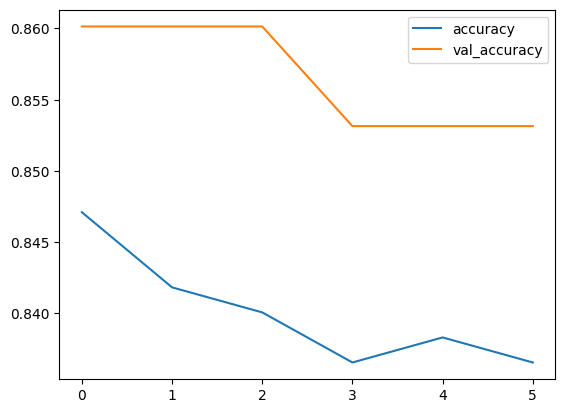

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# Evaluation

In [ ]:
X_test.shape, y_test.shape

((179, 7), (179,))

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_acc)
print(test_loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8360 - loss: 0.4279 
0.826815664768219
0.424121618270874


# Predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[0.08210992],
       [0.06466107],
       [0.07319705],
       [0.97788745],
       [0.53616655],
       [0.9913139 ],
       [0.6189799 ],
       [0.08579694],
       [0.54602087],
       [0.99100727],
       [0.37593624],
       [0.08925042],
       [0.29216573],
       [0.10292437],
       [0.05431359],
       [0.9919697 ],
       [0.32653984],
       [0.61874515],
       [0.06669087],
       [0.26189372],
       [0.10008377],
       [0.3870415 ],
       [0.2949999 ],
       [0.07553387],
       [0.17059357],
       [0.08174133],
       [0.32665935],
       [0.06723925],
       [0.15581028],
       [0.4821657 ],
       [0.07452986],
       [0.5222326 ],
       [0.49105358],
       [0.5008508 ],
       [0.0785191 ],
       [0.09638184],
       [0.43995926],
       [0.6189799 ],
       [0.98535   ],
       [0.15034367],
       [0.11236446],
       [0.08363352],
       [0.15079601],
       [0.05610367],
       [0.74717593],
       [0.15820096],
       [0.07498412],
       [0.091

In [ ]:
y_pred[0]

array([0.08210992], dtype=float32)

In [ ]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [ ]:
y_pred_max_proba = [i[0] for i in y_pred]

# Convert probabilities to class predictions (threshold 0.5)
y_pred_class = [i[0] for i in (y_pred >= 0.5).astype(int)]

ground_truth = y_test.values

d1 = pd.DataFrame(zip(y_pred_max_proba,y_pred_class,ground_truth),columns=['Max_Proba','Prediction_Class','Ground_Truth_Class'])
d1

,Max_Proba,Prediction_Class,Ground_Truth_Class
0,0.082110,0,1
1,0.064661,0,0
2,0.073197,0,0
3,0.977887,1,1
4,0.536167,1,1
...,...,...,...
174,0.090823,0,0
175,0.131069,0,0
176,0.244334,0,1
177,0.948784,1,1


In [ ]:
con = d1['Prediction_Class'] == d1['Ground_Truth_Class']
d1['Output'] = np.where(con,1,0)
d1

,Max_Proba,Prediction_Class,Ground_Truth_Class,Output
0,0.082110,0,1,0
1,0.064661,0,0,1
2,0.073197,0,0,1
3,0.977887,1,1,1
4,0.536167,1,1,1
...,...,...,...,...
174,0.090823,0,0,1
175,0.131069,0,0,1
176,0.244334,0,1,0
177,0.948784,1,1,1


In [ ]:
accuracy = d1['Output'].sum()/len(d1['Output'])
accuracy

np.float64(0.8268156424581006)

# Save the model

In [ ]:
model.save('Titanic_Ann.keras')

# Load the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_model = load_model('Titanic_Ann.keras')

In [ ]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 5,636 (22.02 KB)

In [ ]:
test_df = pd.read_csv(r"test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
passengerid = test_df['PassengerId']

In [ ]:
test_df.drop(['PassengerId','Name','Cabin','Ticket','Parch'],axis=1,inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,1,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S


In [ ]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Fare,1
Embarked,0


In [ ]:
test_df.fillna(test_df['Age'].median(),inplace=True)
test_df.fillna(test_df['Fare'].median(),inplace=True)

In [ ]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Fare,0
Embarked,0


In [ ]:
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [ ]:
en_df = pd.get_dummies(test_df[cat_cols],drop_first=True,dtype='int')
en_df.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [ ]:
sc_df = pd.DataFrame(scaler.transform(test_df[num_cols]),columns=num_cols)
sc_df.head()

,Pclass,Age,SibSp,Fare
0,0.827377,0.394887,-0.474545,-0.490783
1,0.827377,1.355510,0.432793,-0.507479
2,-0.369365,2.508257,-0.474545,-0.453367
3,0.827377,-0.181487,-0.474545,-0.474005
4,0.827377,-0.565736,0.432793,-0.401017


In [ ]:
new_test_df = pd.concat([en_df,sc_df],axis=1)
new_test_df.head()

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Fare
0,1,1,0,0.827377,0.394887,-0.474545,-0.490783
1,0,0,1,0.827377,1.355510,0.432793,-0.507479
2,1,1,0,-0.369365,2.508257,-0.474545,-0.453367
3,1,0,1,0.827377,-0.181487,-0.474545,-0.474005
4,0,0,1,0.827377,-0.565736,0.432793,-0.401017


In [ ]:
test_pred_prob = loaded_model(new_test_df)
test_pred_prob

<tf.Tensor: shape=(418, 1), dtype=float32, numpy=
array([[0.04788622],
       [0.37109777],
       [0.08364857],
       [0.13877133],
       [0.33000317],
       [0.19268298],
       [0.6295837 ],
       [0.09706884],
       [0.70184916],
       [0.06135659],
       [0.13700235],
       [0.32809463],
       [0.9891619 ],
       [0.05781383],
       [0.99743533],
       [0.9633832 ],
       [0.09767992],
       [0.37483296],
       [0.46672478],
       [0.7888624 ],
       [0.44874614],
       [0.5605668 ],
       [0.9873471 ],
       [0.5677883 ],
       [0.9898404 ],
       [0.03445851],
       [0.99149024],
       [0.31008375],
       [0.36484283],
       [0.05645734],
       [0.04530811],
       [0.09419342],
       [0.397126  ],
       [0.4001879 ],
       [0.49658787],
       [0.4882609 ],
       [0.50112545],
       [0.5283038 ],
       [0.11432967],
       [0.5461826 ],
       [0.05941882],
       [0.39823174],
       [0.10999835],
       [0.95732725],
       [0.9972112 ],
     

In [ ]:
test_max_proba = [i[0] for i in test_pred_prob.numpy()]
test_pred_class = [i[0] for i in (test_pred_prob.numpy() >= 0.5).astype(int)]

d2 = pd.DataFrame(zip(test_max_proba,test_pred_class),columns=['Max_Proba','Survived'])
d2

,Max_Proba,Survived
0,0.047886,0
1,0.371098,0
2,0.083649,0
3,0.138771,0
4,0.330003,0
...,...,...
413,0.137352,0
414,0.993366,1
415,0.127296,0
416,0.137352,0


In [ ]:
submission_df = pd.concat([passengerid,d2['Survived']],axis=1)
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# Create CSV file

In [ ]:
submission_df.to_csv('submission.csv',index=False)

In [ ]:
pd.read_csv(r'submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**Your Best Entry!
Your most recent submission scored 0.78229, which is the same as your previous score. Keep trying!**

### 3023 rank